In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-05 21:16:04,205 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-05 21:16:04,205 -INFO - common:common.py:616 - Module utils.common is loaded...
2021-06-05 21:16:04,205 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-05 21:16:04,221 -INFO - dataset_builder:dataset_builder.py:202 - dataset package is loaded...
2021-06-05 21:16:04,837 -INFO - dataset:dataset.py:653 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://phys.org'
WAIT_TIME_SECONDS = 7

# LOGIN = 'Roman'
# PASSWORD = 'Jdi1234'
# SAVE_SCREEN = True
# HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
    encoder_dict = { v: k for k, v in decoder_dict.items()}
decoder_dict, encoder_dict

({0: 'button',
  1: 'link',
  2: 'textfield',
  3: 'dropdown',
  4: 'checkbox',
  5: 'radiobutton',
  6: 'textarea',
  7: 'fileinput',
  8: 'iframe',
  9: 'range',
  10: 'progressbar',
  11: 'datetimeselector',
  12: 'colorpicker',
  13: 'numberselector',
  14: 'selector',
  15: 'table',
  16: 'slider-toggle',
  17: 'slider',
  18: 'tree-node',
  19: 'steper',
  20: 'tab',
  21: 'n/a'},
 {'button': 0,
  'link': 1,
  'textfield': 2,
  'dropdown': 3,
  'checkbox': 4,
  'radiobutton': 5,
  'textarea': 6,
  'fileinput': 7,
  'iframe': 8,
  'range': 9,
  'progressbar': 10,
  'datetimeselector': 11,
  'colorpicker': 12,
  'numberselector': 13,
  'selector': 14,
  'table': 15,
  'slider-toggle': 16,
  'slider': 17,
  'tree-node': 18,
  'steper': 19,
  'tab': 20,
  'n/a': 21})

# Generate dataset

2021-06-05 21:16:04,918 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: phys-org
2021-06-05 21:16:04,919 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-06-05 21:16:04,921 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-06-05 21:16:05,491 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-06-05 21:16:05,491 -INFO - <ipython-input-6-4d923fd52850>:<ipython-input-6-4d923fd52850>:5 - getting page
2021-06-05 21:16:13,779 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/phys-org.png
2021-06-05 21:16:14,965 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-06-05 21:16:17,051 -INFO - dataset_builder:dataset_builder.py:186 - Save html to dataset/html/phys-org.html
2021-06-05 21:16:17,091 -INFO - dataset_builder:dataset_builder.py:196 - Save parquet to dataset/df/phys-org.parquet
2021-06-05 21:16:17,788 -INFO - dataset

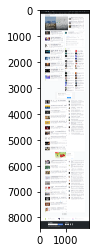

In [6]:
DATASET_NAME = 'phys-org'
class JDIDatasetBuilder(DatasetBuilder):

    def setUp(self, driver):
        self.logger.info(f'getting page')
        driver.get(SITE_URL)
        driver.set_window_size(width=1920, height=8400)
        
#         driver.find_element_by_id("user-icon").click()
#         driver.find_element_by_id("name").send_keys(LOGIN)
#         driver.find_element_by_id("password").send_keys(PASSWORD)
#         driver.find_element_by_id("login-button").click()
        sleep(WAIT_TIME_SECONDS)
        
#         driver.find_element_by_link_text("Service").click()
#         driver.find_element_by_link_text("Complex Table").click()
#         maximize_window(driver=driver)
        

with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
    elements_df = builder.dataset
    plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))



In [7]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [8]:
df = build_features(df)

2021-06-05 21:16:19,105 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [9]:
elements_dict = build_elements_dict(df)

In [10]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

tag_name                    element_id                     parent_id  \
0        HTML  7067374513169749704676044836                          None   
1        HEAD  8597579147169749706634265195  7067374513169749704676044836   
2        META  5121402697169749707325113496  8597579147169749706634265195   
3        META  1593115405169749708325720161  8597579147169749706634265195   
4       TITLE  0343536087169749705438192295  8597579147169749706634265195   
...       ...                           ...                           ...   
2774      INS  0523502866169749738640082221  6144826271169749735964108138   
2775   IFRAME  0063266539169749739208946484  0523502866169749738640082221   
2776   IFRAME  4853168232169749736669485854  4370185044169749701037274775   
2777   IFRAME  5463233428169749736065785559  4370185044169749701037274775   
2778   IFRAME  5904720461169749739189300422  7067374513169749704676044836   

                     upper_sibling                 lower_sibling  displayed  \
0                             None                          None       True   
1                             None  4370185044169749701037274775      False   
2                             None  1593115405169749708325720161      False   
3     5121402697169749707325113496  0343536087169749705438192295      False   
4     1593115405169749708325720161  2136002431169749705565669778      False   
...                            ...                           ...        ...   
2774                          None                          None      False   
2775                          None                          None      False   
2776  9970983424169749735144180555  5463233428169749736065785559      False   
2777  4853168232169749736669485854                          None      False   
2778  4370185044169749701037274775                          None      False   

      is_hidden    x    y   width  height  
0             0  0.0  0.0  1903.0  8400.0  
1             0  0.0  0.0     0.0     0.0  
2             0  0.0  0.0     0.0     0.0  
3             0  0.0  0.0     0.0     0.0  
4             0  0.0  0.0     0.0     0.0  
...         ...  ...  ...     ...     ...  
2774          1  0.0  0.0     0.0     0.0  
2775          1  0.0  0.0     0.0     0.0  
2776          1  0.0  0.0     0.0     0.0  
2777          1  0.0  0.0     0.0     0.0  
2778          0  0.0  0.0     0.0     0.0  

[2779 rows x 11 columns]

In [11]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 100))
# plt.imshow(img, cmap='gray')

In [12]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
# predictions_df

2021-06-05 21:16:20,507 -INFO - common:common.py:489 - Num radio buttons found: 0
2021-06-05 21:16:20,512 -INFO - common:common.py:493 - Num radio2 buttons found: 0
2021-06-05 21:16:20,515 -INFO - common:common.py:500 - Num checkboxes found: 0
2021-06-05 21:16:20,519 -INFO - common:common.py:507 - Num comboboxes/dropdowns found: 0
2021-06-05 21:16:20,523 -INFO - common:common.py:518 - Num textfields found: 1
2021-06-05 21:16:20,527 -INFO - common:common.py:523 - Num texfields for numbers found: 0
2021-06-05 21:16:20,531 -INFO - common:common.py:528 - Num ranges found: 0
2021-06-05 21:16:20,535 -INFO - common:common.py:533 - Num ordinary text inputs found: 0
2021-06-05 21:16:20,536 -INFO - common:common.py:536 - Num buttons found: 7
2021-06-05 21:16:20,540 -INFO - common:common.py:541 - Num buttons1 found: 0
2021-06-05 21:16:20,544 -INFO - common:common.py:546 - Num buttons2 (Material-UI) found: 0
2021-06-05 21:16:20,547 -INFO - common:common.py:551 - Num links found: 316
(221, 8)


In [13]:
predictions_df.columns

Index(['element_id', 'x', 'y', 'width', 'height', 'displayed', 'is_hidden',
       'label'],
      dtype='object')

In [14]:
radio_df = df[(df.tag_name == 'LABEL') & 
              df.attributes.apply(lambda x: x.get('class') == 'j-list-item filters-item') & 
              df.displayed & (df.is_hidden == 0) & (df.width > 0.0) & (df.height>0.0)
             ].copy()
radio_df['label'] = encoder_dict['radiobutton']
radio_df = radio_df[predictions_df.columns]

In [15]:
radio_df

Empty DataFrame
Columns: [element_id, x, y, width, height, displayed, is_hidden, label]
Index: []

In [16]:
checkbox_df = df[(df.tag_name == 'LABEL') & 
              df.attributes.apply(lambda x: x.get('class') == 'j-list-item filters-item c-checkbox-withText-v1') & 
              df.displayed & (df.is_hidden == 0) & (df.width > 0.0) & (df.height>0.0)
             ].copy()
checkbox_df['label'] = encoder_dict['checkbox']
checkbox_df = checkbox_df[predictions_df.columns]
checkbox_df

Empty DataFrame
Columns: [element_id, x, y, width, height, displayed, is_hidden, label]
Index: []

In [17]:
predictions_df = pd.concat([predictions_df, radio_df, checkbox_df])

1920 8400


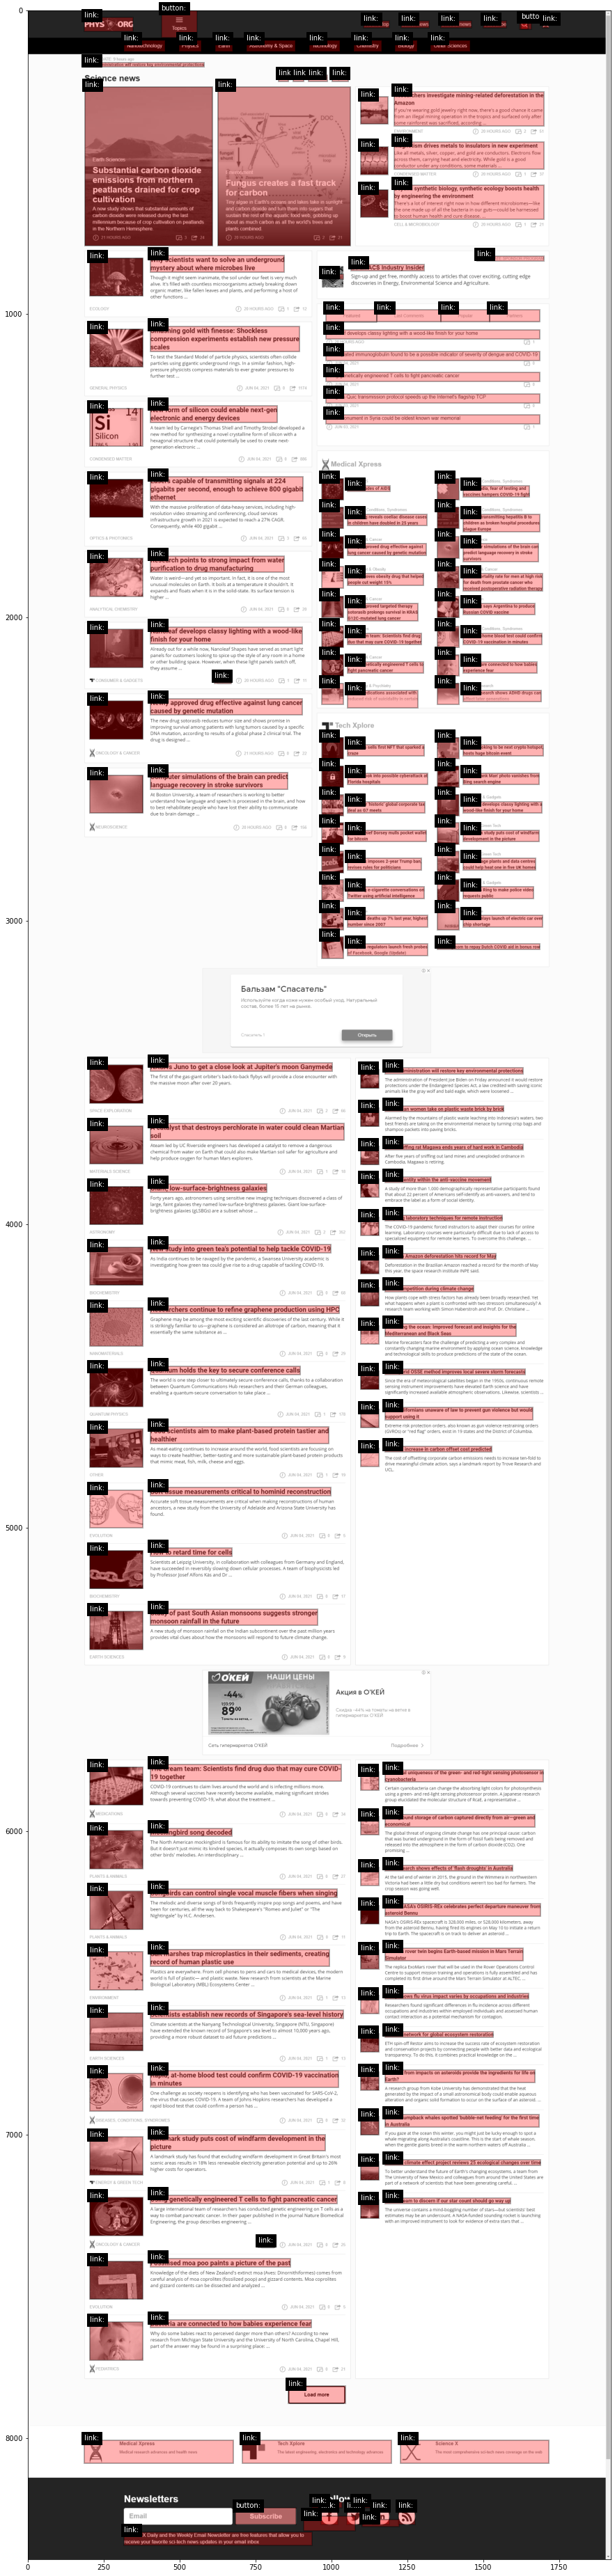

In [18]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in predictions_df.iterrows():
    
    patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(r.x, r.y, 
             decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

# Generate and Save Labels

In [28]:
# labels = build_to_yolo(df = predictions_df, img_width=img_width, img_heght=img_height)
# labels

In [29]:
# labeled_df = pd.DataFrame(labels, columns=['label', 'x', 'y', 'width', 'height'])
# labeled_df.label = labeled_df.label.astype(int)
# display(labeled_df)
# labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)

# Preview Labels

In [30]:
boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
boxes_df
boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
boxes_df.head()

label         x         y     width    height                   box
0      0  0.259375  0.005357  0.061458  0.010476     (439, 0, 117, 87)
1      0  0.853646  0.005298  0.020833  0.004167    (1619, 27, 39, 35)
2      0  0.851562  0.005298  0.011458  0.004167    (1623, 27, 21, 35)
3      0  0.407813  0.983036  0.104167  0.006548  (683, 8230, 200, 55)
4      1  0.138542  0.005298  0.083333  0.005357    (186, 22, 159, 44)

1920 8400


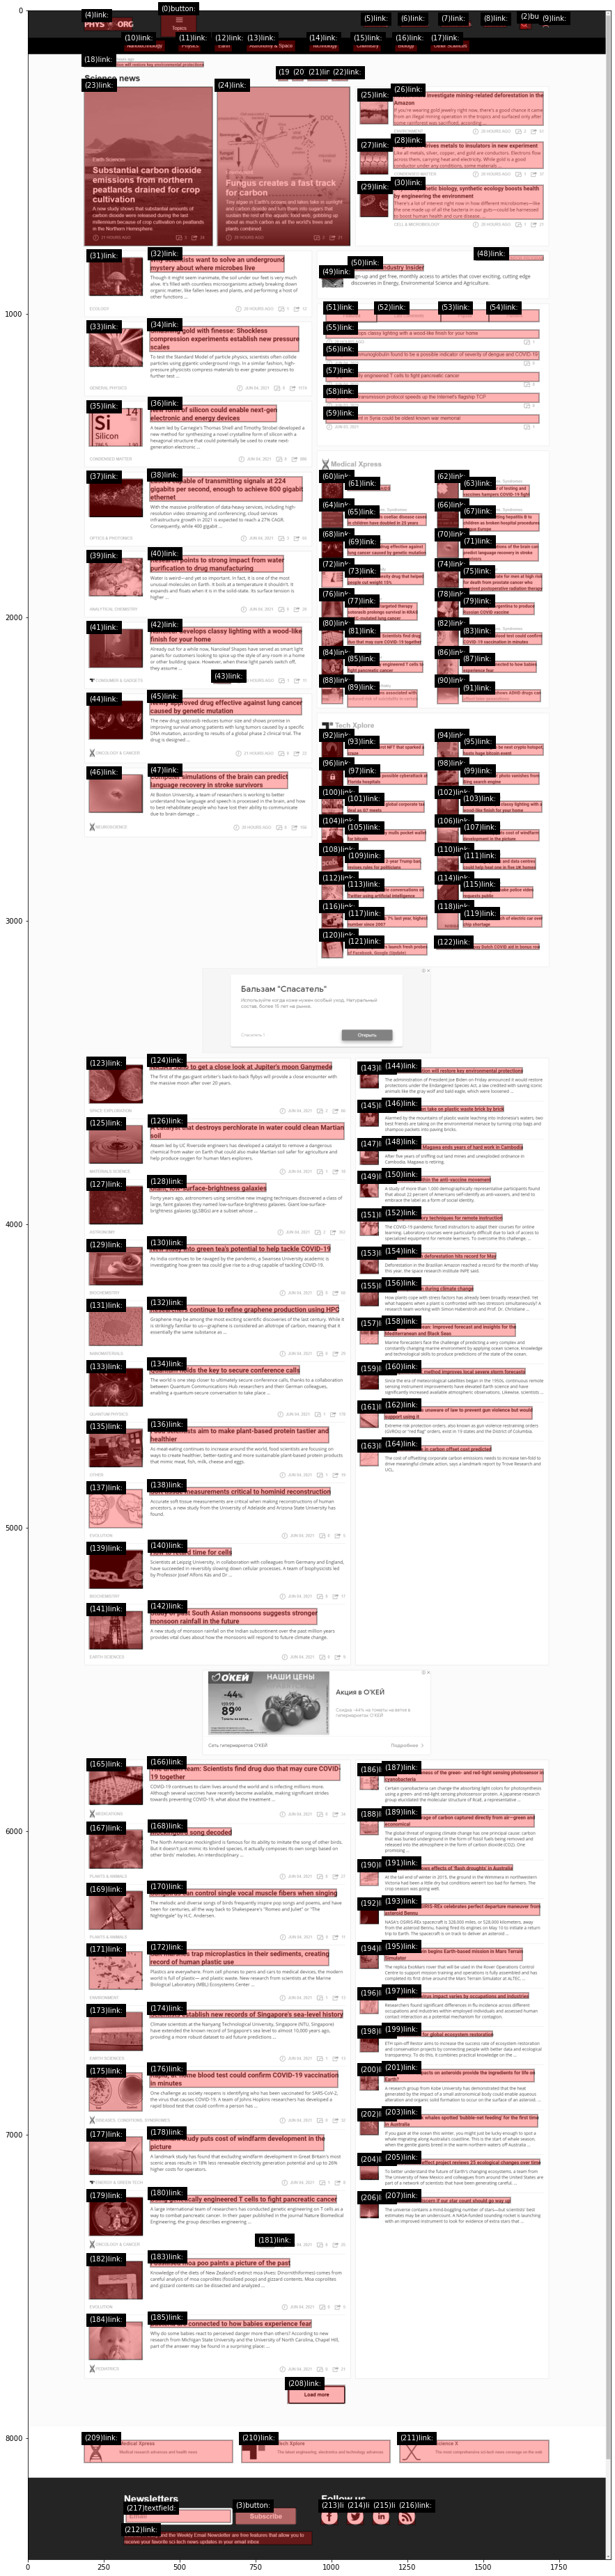

In [31]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for i, r in boxes_df.iterrows():
    x, y, w, h = from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height)    
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(x, y, 
             f'({i})' + decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

# Preview Assigned Labels

In [34]:
# df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings', 'idx',
       'label', 'annotation_line_no', 'iou', 'tag', 'label_text'],
      dtype='object')

In [35]:
columns_to_drop = set(df.columns).intersection(set(['label', 'annotation_line_no', 'iou', 'tag', 'label_text']))
if len(columns_to_drop) >= 0:
    df.drop(columns=columns_to_drop, inplace=True)

In [36]:
df = assign_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=img_width, img_height=img_height)

2021-06-05 21:24:16,524 -INFO - labels:labels.py:38 - Assign labels from annotation file: dataset/annotations/phys-org.txt
2021-06-05 21:24:16,525 -INFO - labels:labels.py:40 - Getting image size
2021-06-05 21:24:16,525 -INFO - labels:labels.py:42 - Image size (w,h): (1920, 8400)
2021-06-05 21:24:16,526 -INFO - labels:labels.py:47 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-05 21:24:16,527 -INFO - labels:labels.py:55 - getting "n/a" class code
2021-06-05 21:24:16,528 -INFO - labels:labels.py:62 - "n/a" class code: 21
2021-06-05 21:24:16,530 -INFO - labels:labels.py:72 - 218 annotation has been read


Assign labels:   0%|          | 0/218 [00:00<?, ?it/s]

2021-06-05 21:25:13,164 -INFO - labels:labels.py:121 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-05 21:25:13,164 -INFO - labels:labels.py:124 - 218 labels have been assigned


In [37]:
# df = build_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=0, img_height=0)

In [38]:
df.label.value_counts()

21    2561
1      213
0        4
2        1
Name: label, dtype: int64

1920 8400


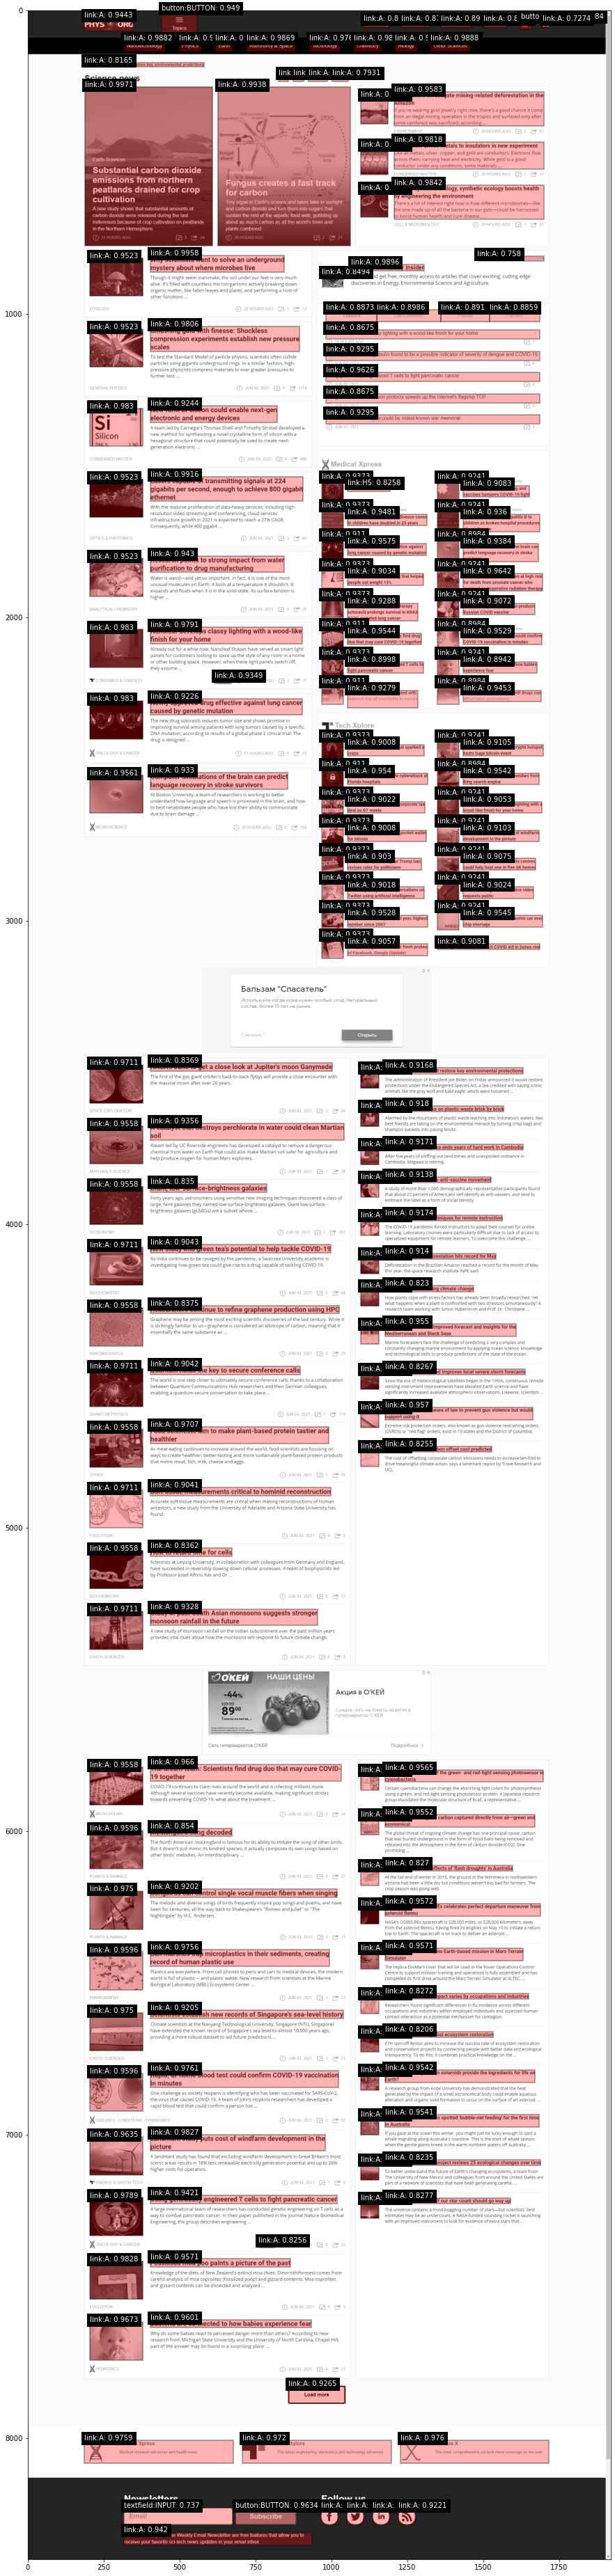

In [39]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in df[df.label_text != 'n/a'].iterrows():
    x, y, w, h = r.x, r.y, r.width, r.height  
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    
    # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)
    
    axes.add_patch(patch)
    plt.text(x, y, 
             decoder_dict[r.label] + ':' + r.tag_name + ': ' + str(round(r.iou, 4)), # + ':' + str((x, y, w, h)),  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
